# Clasificación multiclase con redes neuronales en Keras
___

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Importar Dataset

In [ ]:
#https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Explorar el dataset

#### Conjunto de entrenamiento

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
y_train_full[0]

9

#### Conjunto de prueba

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

#### Visualizando una instancia

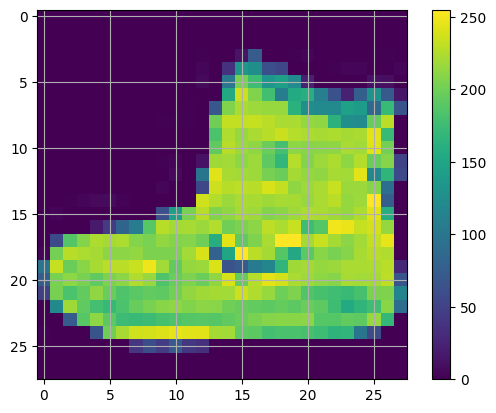

In [ ]:
plt.figure()
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(True)
plt.show()

#### Clases

In [ ]:
y_train_full[0]

9

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train_full[0]]

'Ankle boot'

#### Visualizando las primeras 25 instancias

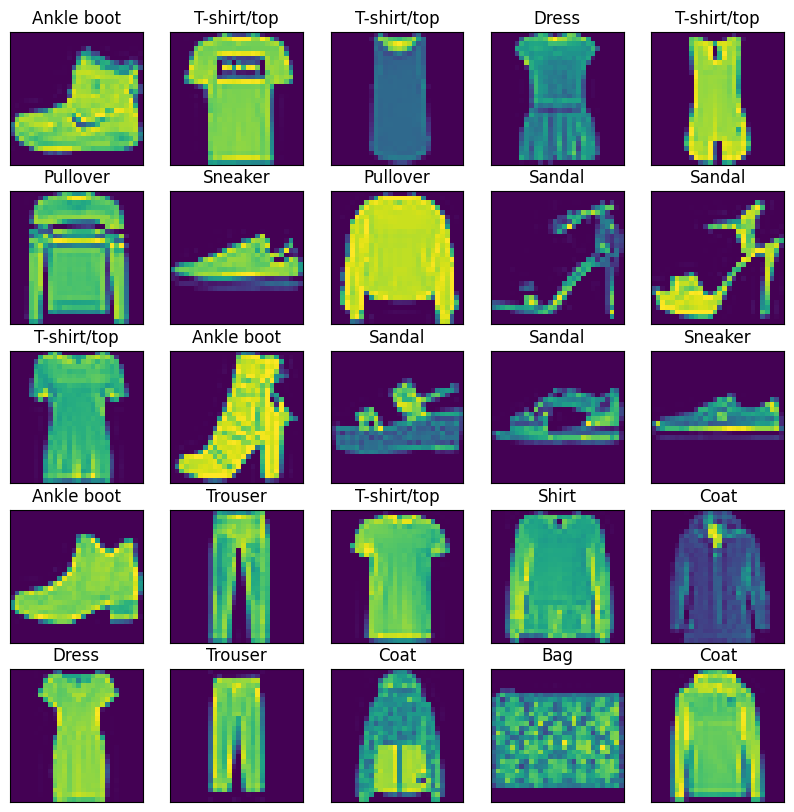

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train_full[i])
    #plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.title(class_names[(y_train_full[i])])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Preprocesamiento

#### Escalamiento de características

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
X_train_full = X_train_full / 255
X_test = X_test / 255

In [ ]:
X_train_full.dtype

dtype('float64')

In [ ]:
X_train_full[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Crear conjunto de validación

In [ ]:
# Separar el conjunto de entrenamiento completo en validación y entrenamiento
X_train = X_train_full[:55000]
y_train = y_train_full[:55000]

X_validation = X_train_full[55000:]
y_validation = y_train_full[55000:]

In [ ]:
X_validation.shape

(5000, 28, 28)

In [ ]:
X_train.shape

(55000, 28, 28)

# Modelo

#### Crear el modelo y añadir capas

In [ ]:
from tensorflow.keras import layers
from keras import models

model = keras.models.Sequential()
model.add(layers.Conv2D(_, (_,_), activation=_,input_shape=(28,28,1)))
...



In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.layers

#### Analizando W y b ¿Cómo se inicializan los W y b?

In [ ]:
from keras.utils import to_categorical

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_validation = X_validation.reshape((X_validation.shape[0], 28, 28, 1))

In [ ]:
train_labels = to_categorical(y_train)
validation_labels = to_categorical(y_validation)
test_labels = to_categorical(y_test)

# Configurar el proceso de aprendizaje (Compilar)
Se especifica:
- Loss function
- Optimizer
- Metrics (Opcional, en caso de querer observar métricas extra durante el entrenamiento o evaluación)

In [ ]:
model.compile(loss=__,
              optimizer=__,
              metrics=[__])

# Entrenamiento y evaluación en datos de validación
Los datos de validación son opcionales, pero si los pasamos como parámetros en el método `fit()`, Keras medirá el loss y las demás métricas que le indiquemos sobre el conjunto de validación al final de cada época.

Se pueden pasar como parámetros los datos de validación con `validation_data`. Si se usa `validation_split`, la fracción de datos que indiquemos será usada como validación (se tomarán los datos del final del conjunto y no se usarán en el entrenamiento). `validation_data` sobrescribe `validation_split`.

- Si el performance es mucho mejor en el conjunto de entrenamiento que en el de validación hay ->

In [ ]:
# Si quieres usar el conjunto de validación hecho por ti
history = model.fit(X_train,
                    train_labels,
                    epochs=__,
                    batch_size=__,
                    validation_data=(X_validation,validation_labels))


# Si quieres que Keras cree el conjunto de validación
#history = model.fit(X_train_full,
                    #y_train_full,
                    #epochs=__,
                    #batch_size=__,
                    #validation_split=0.1)

Epoch 1/10
1719/1719 [==============================] - 23s 6ms/step - loss: 0.5047 - accuracy: 0.8143 - val_loss: 0.3483 - val_accuracy: 0.8746
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3301 - accuracy: 0.8794 - val_loss: 0.2985 - val_accuracy: 0.8960
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2836 - accuracy: 0.8955 - val_loss: 0.2693 - val_accuracy: 0.9008
Epoch 4/10
 814/1719 [=============>................] - ETA: 4s - loss: 0.2488 - accuracy: 0.9065

#### History

Objeto regresado por el método `fit()` que contiene:
- Parámetros de entrenamiento
- La lísta de épocas
- Loss y métricas obtenidas al final de cada época

In [ ]:
history.params

In [ ]:
history.epoch

In [ ]:
history.history

#### Curvas de aprendizaje

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
#Si quisiéramos seguir entrenando usando nuestro conjunto de validación
history2 = model.fit(X_train,
                     train_labels,
                     epochs=90,
                     batch_size=32,
                     validation_data=(X_validation,validation_labels),
                     initial_epoch= final_epoc)


#Si quisiéramos seguir entrenando usando el conjunto de validación creado por Keras
#history2 = model.fit(X_train_full,
                     #y_train_full,
                     #epochs=90,
                     #batch_size=32,
                     #validation_split=0.1,
                     #initial_epoch=10)

In [ ]:
#Si quisiéramos ver las curvas de aprendizaje de un segundo entrenamiento
pd.DataFrame(history2.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluación en conjunto de prueba

Estimamos el error de generalización.

In [ ]:
loss_and_metrics = model.evaluate(X_test, test_labels)

# Predicción en nuevos datos

In [ ]:
X_new = X_test[:5]

#### Probabilidad estimada por clase

In [ ]:
y_proba = model.predict(X_new).round(2)
y_proba

#### Clase con mayor probabilidad

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
y_test[:5]

# Guardar y restaurar el modelo

#### Guardar modelo

In [ ]:
model.save('keras_fashion.h5') #En formato HDF5

#### Restaurar un modelo

In [ ]:
model = keras.models.load_model('keras_fashion.h5')

In [ ]:
X_new = X_test[:5] # pretend these are new instances
y_pred = model.predict_classes(X_new)
y_pred

# Reset model

In [ ]:
tf.keras.backend.clear_session()